## Learning a reduced rank Markov Chain


$\newcommand{\ind}[1]{\left[{#1}\right]}$
$\newcommand{\E}[1]{\left\langle#1\right\rangle}$

Suppose we are given the Markov chain with transition probabilities $p(x_t = i| z_{t-1} = k) =  W_{i,k}$,
$p(z_{t-1} = k| x_{t-1} = j) =  H_{k,j}$
and initial state $p(x_1) = \pi_i$.

The distributions are
\begin{eqnarray}
p(x_1 |\pi)& = &\prod_{i'=1}^{S} \pi_{i'}^{\ind{i' = x_1}} \\
p(x_t | z_{t-1}, W) &=& \prod_{k'=1}^{R} \prod_{i'=1}^{S}  W_{i',k'}^{{\ind{i' = x_t}}\ind{k' = z_{t-1}}} \\
p(z_{t-1}| x_{t-1}, H) &=& \prod_{j'=1}^{S} \prod_{k'=1}^{R}  H_{k',j'}^{\ind{k' = z_{t-1}}\ind{j' = x_{t-1}}} 
\end{eqnarray}

The complete data loglikelihood is
\begin{eqnarray}
{\cal L}(\pi, W, H) & = & \log \left( p(x_1 | \pi) \prod_{t=2}^T p(x_t | z_{t-1}, W)p( z_{t-1} | x_{t-1}, H) \right) \\
& = & \sum_{i'=1}^{S} {\ind{i' = x_1}} \log \pi_{i'} + \sum_{t=2}^T \sum_{k'=1}^{R} \sum_{i'=1}^{S} {{\ind{i' = x_t}}\ind{k' = z_{t-1}}} \log W_{i',k'} + 
\sum_{t=2}^T \sum_{j'=1}^{S} \sum_{k'=1}^{R} {\ind{k' = z_{t-1}}\ind{j' = x_{t-1}}} \log H_{k',j'} 
\end{eqnarray}

Note that we have the identities
\begin{eqnarray}
\ind{i' = x_t}\ind{k' = z_{t-1}}  & = & {\ind{i' = x_t}}\ind{k' = z_{t-1}} \sum_{j'} {\ind{j' = x_{t-1}}} \\
\ind{k' = z_{t-1}}\ind{j' = x_{t-1}} & = & \left(\sum_{i'} {\ind{i' = x_t}} \right) \ind{k' = z_{t-1}}\ind{j' = x_{t-1}}
\end{eqnarray}

So the complete data likelihood can be simplified as 
\begin{eqnarray}
{\cal L}(\pi, W, H) & = & \log \left( p(x_1 | \pi) \prod_{t=2}^T p(x_t | z_{t-1}, W)p( z_{t-1} | x_{t-1}, H) \right) \\
& = & \sum_{i'=1}^{S} {\ind{i' = x_1}} \log \pi_{i'} + \sum_{t=2}^T \sum_{k'=1}^{R} \sum_{i'=1}^{S} \sum_{j'=1}^{S} {{\ind{i' = x_t}}\ind{k' = z_{t-1}} \ind{j' = x_{t-1}}} ( \log W_{i',k'} + \log H_{k',j'} )
\end{eqnarray}

\begin{eqnarray}
p(x, z|W,H) = \prod_{i'=1}^{S} \pi_{i'}^{\ind{i' = x_1}} \left( \prod_{t=2}^T \prod_{k'=1}^{R} \prod_{i'=1}^{S} \prod_{j'=1}^{S}  (W_{i',k'}H_{k',j'})^{{\ind{i' = x_t}}\ind{j' = x_{t-1}} \ind{k' = z_{t-1}} } \right)
\end{eqnarray}

\begin{eqnarray}
p(x|W,H)& = & \pi_{x_1} \sum_{z_1} \dots \sum_{z_{T-1}}  \left( \prod_{t=2}^T   W_{x_t,z_{t-1}}H_{z_{t-1},x_{t-1}} \right) \\
&=& \sum_{z_1} \left(W_{x_2,z_1}H_{z_1,x_1}\right)
\sum_{z_{2}}
\left(W_{x_3,z_2}H_{z_2,x_2}\right)
\cdots
\sum_{z_{T-1}} 
\left(W_{x_T,z_{T-1}}H_{z_{T-1},x_{T-1}}\right)
\end{eqnarray}


We partition $\{2 \dots {T}\} = \cup_{(i,j)} t{(i,j)}$ where $t{(i,j)} = \{t : x_{t-1} = j, x_{t} = i \}$  

\begin{eqnarray}
p(x|W,H) & = & \prod_{a=1}^S \prod_{b=1}^S \prod_{\tau \in {t(i,j)}}  \left( \sum_{z_\tau} W_{i,z_\tau}H_{z_\tau,j}\right) \\
& = & \prod_{i=1}^S \prod_{j=1}^S  \left(W_{i,1}H_{1,j} + W_{i,2}H_{2,j} + \dots + W_{i,R}H_{R,j} \right)^{C_{i,j}} \\
\end{eqnarray}

In total there are 
\begin{eqnarray}
\prod_{i=1}^S \prod_{j=1}^S \binom{C_{i,j}+R-1}{R}
\end{eqnarray}
terms

We have the constraints $\sum_{i'} \pi_{i'} = 1$, $\sum_{i'} W_{i',k} = 1$ for all $k=1 \dots R$ and $\sum_{k'} H_{k',j} = 1$ for all $j=1 \dots S$ so we have $R+S+1$ constraints. We write the Lagrangian
\begin{eqnarray}
\Lambda(\pi, W, H, \lambda^\pi, \lambda^W, \lambda^H) & = & 
\sum_{i'=1}^{S} \E{\ind{i' = x_1}} \log \pi_{i'} 
+ \sum_{t=2}^T \sum_{k'=1}^{R} \sum_{i'=1}^{S} \sum_{j'=1}^{S} \E{{\ind{i' = x_t}}\ind{k' = z_{t-1}}{\ind{j' = x_{t-1}}} } ( \log W_{i',k'} + \log H_{k',j'} )\\
& & + \lambda^\pi \left( 1 - \sum_{i'} \pi_{i'} \right) + \sum_{k'} \lambda^W_k \left( 1 - \sum_{i'} W_{i',k'} \right) + \sum_{j'} \lambda^H_j \left( 1 - \sum_{k'} H_{k',j'} \right)
\end{eqnarray}

The EM algorithm replaces sufficient statistics with their expectations with respect to the 
posterior $p(z_{1:T-1}|x_{1:T})$. 

### The E Step

Due to the conditional independence structure we have
$$p(z_{1:T-1}|x_{1:T}) = \prod_{t=2}^T p(z_{t-1}|x_{t}, x_{t-1})$$

\begin{eqnarray}
p(z_{t-1}| x_{t}, x_{t-1}) & = & \frac{p(x_{t}, z_{t-1} | x_{t-1})}{p(x_{t}| x_{t-1})} \\
& = & \frac{p(z_{t-1} | x_{t-1}) p(x_{t} | z_{t-1})}{p(x_{t}| x_{t-1})} \\
\end{eqnarray}

\begin{eqnarray}
p(z_{t-1}=k| x_{t}=i', x_{t-1}=j') & = & \frac{p(x_{t}=i', z_{t-1}=k | x_{t-1}=j')}{p(x_{t}=i'| x_{t-1}=j')} \\
& = & \frac{p(x_{t}=i' | z_{t-1}=k) p(z_{t-1}=k| x_{t-1}=j') }{p(x_{t}=i'| x_{t-1}=j')} \\
& = & W_{i',k} H_{k,j'} / \sum_{k'} W_{i',k'} H_{k',j'}
\end{eqnarray}
This implies that the posterior is independent of $t$:
\begin{eqnarray}
\E{\ind{k' = z_{t-1}}} & = & W_{i',k} H_{k,j'} / \sum_{k'} W_{i',k'} H_{k',j'}
\end{eqnarray}


\begin{eqnarray}
\frac{\partial \Lambda}{\partial W_{i,k}} & = &  \frac{\partial}{\partial W_{i,k}} \left(
\sum_{t=2}^T \sum_{k'=1}^{R} \sum_{i'=1}^{S} \sum_{j'=1}^{S} \E{{\ind{i' = x_t}}\ind{k' = z_{t-1}}{\ind{j' = x_{t-1}}} }\log W_{i,k} - \lambda^W_k W_{i,k}  \right) \\
W_{i,k} & = & \sum_{t=2}^T \sum_{j'=1}^{S} \E{\ind{i = x_t}\ind{k = z_{t-1}}{\ind{j' = x_{t-1}}} }/\lambda^W_k
\end{eqnarray}
Solving for the Lagrange multiplier by substituting the constraint $\sum_{i'} W_{i',k} = 1$ results in

\begin{eqnarray}
W_{i,k} & = & \frac{\sum_{t=2}^T \sum_{j'=1}^{S} \E{\ind{i = x_t}\ind{k = z_{t-1}}{\ind{j' = x_{t-1}}} }}{\sum_{t=2}^T \sum_{i'=1}^{S} \sum_{j'=1}^{S} \E{\ind{i' = x_t}\ind{k = z_{t-1}}{\ind{j' = x_{t-1}}} }} 
\end{eqnarray}
By proceeding similarly for $H$, we obtain

\begin{eqnarray}
H_{k,j} & = & \frac{\sum_{t=2}^T \sum_{i'=1}^{S} \E{\ind{i' = x_t}\ind{k = z_{t-1}}{\ind{j = x_{t-1}}} }}{\sum_{t=2}^T \sum_{i'=1}^{S} \sum_{j'=1}^{S} \E{\ind{i' = x_t}\ind{k = z_{t-1}}{\ind{j' = x_{t-1}}} }} 
\end{eqnarray}


These equations can be simplified. The observed statistics are
\begin{eqnarray}
C_{i,j} & = & \sum_{t=2}^T \ind{i = x_t} {\ind{j = x_{t-1}}} 
\end{eqnarray}

\begin{eqnarray}
\sum_{t=2}^T \sum_{j'=1}^{S} \E{\ind{i = x_t}\ind{k = z_{t-1}}{\ind{j' = x_{t-1}}} }  & = & 
\sum_{t=2}^T \sum_{j'=1}^{S} \ind{i = x_t} (\frac{W_{i',k} H_{k,j'}}{\sum_{k'} W_{i',k'} H_{k',j'}}) {\ind{j' = x_{t-1}}}  \\
 & = & 
\sum_{j'=1}^{S}(\frac{W_{i',k} H_{k,j'}}{\sum_{k'} W_{i',k'} H_{k',j'}}) \sum_{t=2}^T \ind{i = x_t} {\ind{j' = x_{t-1}}}  \\
& = & 
W_{i,k} \sum_{j'=1}^{S} \frac{ C_{i,j'}  H_{k,j'}}{\sum_{k'} W_{i,k'} H_{k',j'}}   \\
\end{eqnarray}

Similarly
\begin{eqnarray}
\sum_{t=2}^T \sum_{i'=1}^{S} \E{\ind{i' = x_t}\ind{k = z_{t-1}}{\ind{j = x_{t-1}}} } & = & 
H_{k,j} \sum_{i'=1}^{S} \frac{ C_{i',j}  W_{i',k}}{\sum_{k'} W_{i,k'} H_{k',j'}}  
\end{eqnarray}

The update rules are:
\begin{eqnarray}
\tilde{W}_{i,k} & \leftarrow & W_{i,k} \sum_{j'=1}^{S} \frac{ C_{i,j'}  H_{k,j'}}{\sum_{k'} W_{i,k'} H_{k',j'}} \\
W_{i,k} & \leftarrow & \tilde{W}_{i,k}/\sum_{i'}\tilde{W}_{i',k}  
\end{eqnarray}


\begin{eqnarray}
\tilde{H}_{k,j} & \leftarrow & 
H_{k,j} \sum_{i'=1}^{S} \frac{ C_{i',j}  W_{i',k}}{\sum_{k'} W_{i,k'} H_{k',j'}}  \\
H_{k,j} & \leftarrow & \tilde{H}_{k,j}/\sum_{k'}\tilde{H}_{k',j}  
\end{eqnarray}



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

# Some utility functions

def randgen(pr, N=1): 
    L = len(pr)
    return int(np.random.choice(range(L), size=N, replace=True, p=pr))

def log_sum_exp(l, axis=0):
    l_star = np.max(l, axis=axis, keepdims=True)
    return l_star + np.log(np.sum(np.exp(l - l_star),axis=axis,keepdims=True)) 

def normalize_exp(log_P, axis=None):
    a = np.max(log_P, keepdims=True, axis=axis)
    P = normalize(np.exp(log_P - a), axis=axis)
    return P

def normalize(A, axis=None):
    Z = np.sum(A, axis=axis,keepdims=True)
    idx = np.where(Z == 0)
    Z[idx] = 1
    return A/Z

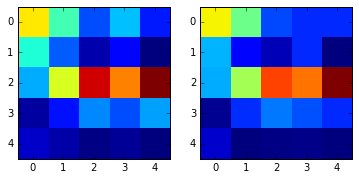

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

from IPython.display import Math
from collections import defaultdict

def count_transitionsMM(x, siz):
    D = np.zeros(siz, int)
    for i in range(len(x)-1):
        D[x[i+1],x[i]] += 1
    
    return D
        
def generate_sequence_reducedMM(W, H, p, T=10):
# T: Number of steps

    x = np.zeros(T,int)
    z = np.zeros(T-1,int)

    for t in range(T):
        if t==0:
            x[t] = randgen(p)
        if t==(T-1):
            x[t] = randgen(W[:,z[t-1]]) 
        else:
            z[t] = randgen(H[:,x[t-1]])
            x[t] = randgen(W[:,z[t]]) 

    return x, z

S = 5
R = 2
W = np.array([[0.5, 0.1], [0.3, 0.0],[0.15, 0.7],[0.0, 0.2],[0.05, 0.0]])
H = np.array([[0.9, 0.5, 0.1, 0.3, 0.01], [0.1, 0.5, 0.9, 0.7, 0.99]])
#p = np.array([0.3,0.3,0.4])

U = W.dot(H)
Sig, V = np.linalg.eig(U)
pp = V[:,2]/sum(V[:,2])
p = pp


x, z = generate_sequence_reducedMM(W, H, p, T=1000)


D = count_transitionsMM(x,(S,S))
P = D/float(np.sum(D))

plt.subplot(1,2,1)
plt.imshow(W.dot(H), interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(normalize(P,0), interpolation='nearest')
plt.show()

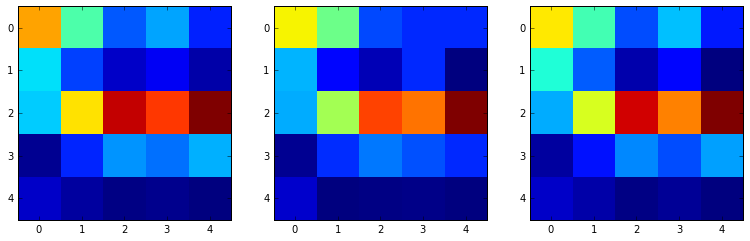

In [14]:

def train_reducedMM(x, W, H):
    T = len(x)
    R = W.shape[1]
    S = W.shape[0]

    alpha = np.zeros((R,T-1))

    EPOCH = 500
    
    for e in range(EPOCH):
        for i in range(T-1):
            alpha[:,i] = W[x[i+1],:]*H[:,x[i]]
            alpha[:,i] = alpha[:,i]/sum(alpha[:,i])

        W_new = np.zeros((S,R))
        H_new = np.zeros((R,S))

        for i in range(T-1):
            W_new[x[i+1],:] += alpha[:,i]
            H_new[:, x[i]]  += alpha[:,i]

        W = normalize(W_new,0)
        H = normalize(H_new,0)

    return W, H

W0 = normalize(np.random.rand(S,R),0)
H0 = normalize(np.random.rand(R,S),0)

Wt, Ht = train_reducedMM(x, W0, H0)

plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.imshow(Wt.dot(Ht), interpolation='nearest')
plt.subplot(1,3,2)
plt.imshow(normalize(P,0), interpolation='nearest')
plt.subplot(1,3,3)
plt.imshow(W.dot(H), interpolation='nearest')
plt.show()

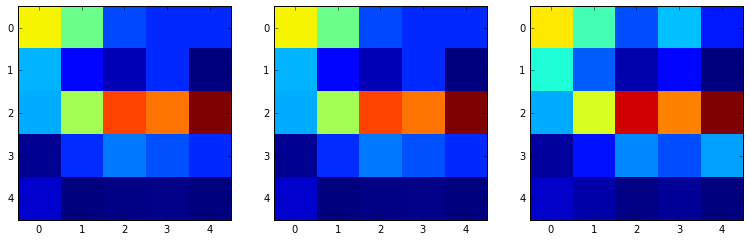

In [15]:
def train_reducedMM_stats(D, W, H):

    R = W.shape[1]
    S = W.shape[0]

    eps = np.finfo(float).eps
    
    EPOCH = 500
    
    for e in range(EPOCH):
        P = W.dot(H)
        
        W = W*((D+eps)/(P+eps)).dot(H.transpose()); 
        W = normalize(W,0)
        
        P = W.dot(H)
        
        H = H*W.transpose().dot((D+eps)/(P+eps))
        H = normalize(H,0)

    return W, H

D = count_transitionsMM(x,(S,S))
P = D/float(np.sum(D))

W0 = normalize(np.random.rand(S,R+3),0)
H0 = normalize(np.random.rand(R+3,S),0)

Wtt, Htt = train_reducedMM_stats(D, W0, H0)

plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
plt.imshow(Wtt.dot(Htt), interpolation='nearest')
plt.subplot(1,3,2)

plt.imshow(normalize(P,0), interpolation='nearest')
plt.subplot(1,3,3)
plt.imshow(W.dot(H), interpolation='nearest')
plt.show()

In [16]:
%matplotlib inline
from collections import defaultdict
from urllib.request import urlopen
import string
import numpy as np
import matplotlib.pyplot as plt

# Turkish
#"ç","ı","ğ","ö","ş","ü",'â'
# German
#"ä","ß","ö","ü"
# French
#"ù","û","ô","â","à","ç","é","è","ê","ë","î","ï","æ"
tr_alphabet = ['•','a','b','c','ç','d','e','f',
                'g','ğ','h','ı','i','j','k','l',
                'm','n','o','ö','p','q','r','s','ş',
                't','u','ü','w','v','x','y','z']
# Union of Frequent letters in French, Turkish, German and English
my_alphabet = ['•','a','â','ä',"à","æ",'b','c','ç','d','e',"é","è","ê","ë",'f',
                'g','ğ','h','ı','i',"î",'ï','j','k','l',
                'm','n','o','œ',"ô",'ö','p','q','r','s','ş',
                't','u','ù',"û",'ü','w','v','x','y','z','ß']
# Only ascii characters
ascii_alphabet = list('•'+string.ascii_lowercase)
# Reduction table from my alphabet to ascii
my2ascii_table = {
    ord('â'):"a",
    ord('ä'):"ae",
    ord("à"):"a",
    ord("æ"):"ae",
    ord('ç'):"c",
    ord("é"):"e",
    ord("è"):"e",
    ord("ê"):"e",
    ord("ë"):"e",
    ord('ğ'):"g",
    ord('ı'):"i",
    ord("î"):"i",
    ord('ï'):"i",
    ord('œ'):"oe",
    ord("ô"):"o",
    ord('ö'):"o",
    ord('ş'):"s",
    ord('ù'):"u",
    ord("û"):"u",
    ord('ü'):"u",
    ord('ß'):"ss"
    }
# Reduction table from my alphabet to frequent letters in turkish text
my2tr_table = {
    ord('â'):"a",
    ord('ä'):"ae",
    ord("à"):"a",
    ord("æ"):"ae",
    ord("é"):"e",
    ord("è"):"e",
    ord("ê"):"e",
    ord("ë"):"e",
    ord("î"):"i",
    ord('ï'):"i",
    ord('œ'):"oe",
    ord("ô"):"o",
    ord('ù'):"u",
    ord("û"):"u",
    ord('ß'):"ss"
    }


def count_transitions(fpp, alphabet, tab):

    #ignore punctuation
    tb = str.maketrans(".\t\n\r ","•••••", '0123456789!"\'#$%&()*,-/:;<=>?@[\\]^_`{|}~+')
    #replace other unicode characters with a bullet (alt-8)
    tbu = {
        ord("İ"):'i',
        ord(u"»"):'•', 
        ord(u"«"):'•', 
        ord(u"°"):'•', 
        ord(u"…"):'•',
        ord(u"”"):'•',
        ord(u"’"):'•',
        ord(u"“"):'•',
        ord(u"\ufeff"):'•',
        775: None}

    # Character pairs 
    D = defaultdict(int)

    for line in fpp:
        s = line.decode('utf-8').translate(tb).lower()
        s = s.translate(tbu)
        s = s.translate(tab)
        #print(s)

        if len(s)>1:
            for i in range(len(s)-1):
                D[s[i:i+2]]+=1
    
    M = len(alphabet)
    a2i = {v: k for k,v in enumerate(alphabet)}
    DD = np.zeros((M,M))

    ky = sorted(D.keys())
    for k in D.keys():
        i = a2i[k[0]]
        j = a2i[k[1]]
        DD[i,j] = D[k]

    return D, DD, alphabet

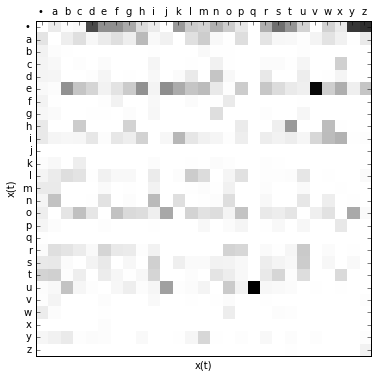

In [17]:
plt.figure(figsize=(6,6))

local = 'file:///Users/cemgil/Dropbox/Public/swe546/data/'
f = 'hamlet.txt'
#f = 'hamlet_turkce.txt'
url = local+f
data = urlopen(url) 
#D, DD, alphabet = count_transitions(data, my_alphabet, {})
D, DD, alphabet = count_transitions(data, ascii_alphabet, my2ascii_table)
#D, DD, alphabet = count_transitions(data, tr_alphabet, my2tr_table)
M = len(alphabet)
DD[0,0] = 1

plt.imshow(normalize(DD.transpose(),0), interpolation='nearest', vmin=0,vmax=0.8,cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.xlabel('x(t-1)')
plt.yticks(range(M), alphabet)
plt.ylabel('x(t)')
ax = plt.gca()
ax.xaxis.tick_top()
#ax.set_title(f, va='bottom')
plt.xlabel('x(t)')

#plt.savefig('transition.pdf',bbox_inches='tight')
plt.show()

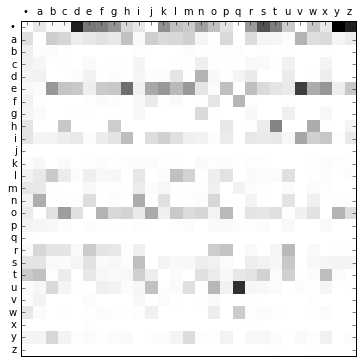

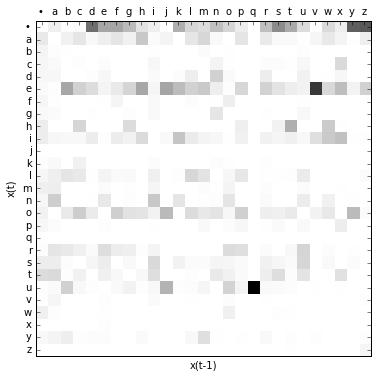

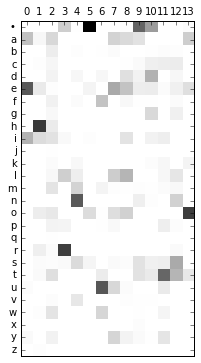

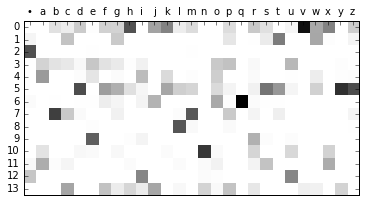

In [30]:
R = 14
savefigs = False
S = DD.shape[0]
D = DD.transpose()

P = D/float(np.sum(D))

W0 = normalize(np.random.rand(S,R),0)
H0 = normalize(np.random.rand(R,S),0)


Wtt, Htt = train_reducedMM_stats(D, W0, H0)

fig1 = plt.figure(figsize=(6,6))
#plt.subplot(2,2,1)
plt.imshow(Wtt.dot(Htt), interpolation='nearest',cmap='gray_r')
plt.xticks(range(M), alphabet)
#plt.xlabel('x(t-1)')
plt.yticks(range(M), alphabet)
#plt.ylabel('x(t)')
ax = plt.gca()
ax.xaxis.tick_top()
if savefigs:
    plt.savefig('WH_MM'+str(R)+'.pdf',bbox_inches='tight')

fig2 = plt.figure(figsize=(6,6))
#plt.subplot(2,2,2)
plt.imshow(normalize(P,0), interpolation='nearest',cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.xlabel('x(t-1)')
plt.yticks(range(M), alphabet)
plt.ylabel('x(t)')
ax = plt.gca()
ax.xaxis.tick_top()
if savefigs:
    plt.savefig('T_MM.pdf',bbox_inches='tight')

fig3 = plt.figure(figsize=(6,6))
#plt.subplot(2,2,3)
plt.imshow(Wtt, interpolation='nearest',cmap='gray_r')
plt.yticks(range(M), alphabet)
plt.xticks(range(R))
ax = plt.gca()
ax.xaxis.tick_top()
if savefigs:
    plt.savefig('W_MM'+str(R)+'.pdf',bbox_inches='tight')

fig4 = plt.figure(figsize=(6,6))
#plt.subplot(2,2,4)
plt.imshow(Htt, interpolation='nearest',cmap='gray_r')
plt.xticks(range(M), alphabet)
plt.yticks(range(R))
ax = plt.gca()
ax.xaxis.tick_top()
if savefigs:
    plt.savefig('H_MM'+str(R)+'.pdf',bbox_inches='tight')
#extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig('H_MM.pdf', bbox_inches=extent.expanded(1.1, 2.2))

plt.show()

In [328]:
import networkx as nx
import itertools as it

def plot_transitions(P, alphabet, xmargin=0.05, ymargin=0.5):
    M = len(alphabet)

    L = np.concatenate((alphabet, alphabet), axis=0)

    labels = {i: c for i,c in enumerate(L)}

    pos = [(int(i/M), M-i%M) for i,c in enumerate(labels)]
    pos2 = [(int(i/M)+1, M-i%M) for i,c in enumerate(labels)]
    A = np.concatenate((np.zeros((M,M)), np.ones((M,M))), axis=1 )
    B = np.concatenate((np.ones((M,M)), np.zeros((M,M))),axis=1 )
    A = np.concatenate((A,B),axis=0)

    G = nx.Graph(A)

    fig = plt.figure(figsize=(10,10))


    gcm = plt.cm.Greys

    #nx.draw_networkx_edges(G, pos, edge_color=np.sqrt(P.reshape((27*27))), edge_cmap=gcm)
    nx.draw_networkx_edges(G, pos, alpha=0.6, width=P.reshape((M*M),order='F'), edge_cmap=gcm)
    nx.draw_networkx_nodes(G, pos, node_color='white', node_size=300)
    nx.draw_networkx_labels(G, pos, labels=labels,font_size=10)

    fig.gca().axis('off')
    #fig.gca().xtick([])
    #fig.gca().ytick([])
    
    fig.gca().set_xlim((-xmargin,1+xmargin))
    fig.gca().set_ylim((-ymargin+1,M+ymargin))

    #nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10)
    #nx.draw(G, pos, node_color="white", node_size=0, arrows=False)
    #nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
    plt.show()
    
    return fig

In [331]:
def plot_transition_graph(Wtt, Htt, alphabet, pos_order=None, scale_z_pos = 3,xmargin=0.05, ymargin=0.5):
    R = Wtt.shape[1]
    M = len(alphabet)
    
    if pos_order is None:
        pos_order = np.arange(M)
    if type(pos_order) is str:
        u = -np.argmax(Htt, axis=0)
        idx_H = np.argsort(u,kind='mergesort')
        pos_order = np.zeros((M,))
        pos_order[idx_H] = np.arange(M)
    

    
    label_z = [ascii(int('0')+c) for c in range(R)]
    L = np.concatenate((alphabet, label_z), axis=0)

    labels = {i: c for i,c in enumerate(L)}

    pos = [(int(i/M), M-i) for i in pos_order]
       
    for i in range(R):
        pos.append((1,M/2-scale_z_pos*R/2+scale_z_pos*i))

    pos2 = pos.copy()
    for i in range(M):
        pos2[i] = (2, pos2[i][1])


    A = np.concatenate((np.zeros((M,M)), np.ones((M,R))), axis=1 )
    B = np.concatenate((np.ones((R,M)), np.zeros((R,R))),axis=1 )
    A = np.concatenate((A,B),axis=0)

    G = nx.Graph(A)

    fig = plt.figure(figsize=(14,14))
    #fig.patch.set_visible(False)



    gcm = plt.cm.Greys

    nx.draw_networkx_edges(G, pos, alpha=0.6, width=Htt.reshape((M*R),order='F'), edge_cmap=gcm)
    nx.draw_networkx_nodes(G, pos, node_color='white', node_size=400)

    nx.draw_networkx_edges(G, pos2, alpha=0.6, width=Wtt.T.reshape((M*R),order='F'), edge_cmap=gcm)
    nx.draw_networkx_nodes(G, pos2, node_color='white', node_size=400)

    nx.draw_networkx_labels(G, pos, labels=labels,font_size=14)
    nx.draw_networkx_labels(G, pos2, labels=labels,font_size=14)
    fig.gca().axis('off')
    fig.gca().set_xlim((-xmargin,2+xmargin))
    fig.gca().set_ylim((-ymargin+1,M+ymargin))

    #nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10)
    #nx.draw(G, pos, node_color="white", node_size=0, arrows=False)
    #nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
    plt.show()  
    
    return fig

In [279]:

def plot_transition_matrix(Wtt, Htt, alphabet, pos_order=None):
    
    M = len(alphabet)
    R = Wtt.shape[1]
    
    if pos_order is None:
        pos_order=np.arange(M)
        
    if type(pos_order) is str:
        u = -np.argmax(Htt, axis=0)
        pos_order = np.argsort(u,kind='mergesort')
    
    
    tks = [alphabet[i] for i in pos_order]
    
    
    figH = plt.figure(figsize=(6,6))
    plt.imshow(Htt[:,pos_order],cmap='gray_r',interpolation='nearest');
    plt.xticks(range(M),tks)
    plt.yticks(range(R))
    
    plt.show()

    figW = plt.figure(figsize=(6,6))    
    plt.imshow(Wtt[pos_order,:],cmap='gray_r',interpolation='nearest');
    plt.yticks(range(M),tks)
    plt.xticks(range(R))
    plt.show()

    figWH = plt.figure(figsize=(6,6))    
    plt.imshow(Wtt.dot(Htt)[pos_order][:,pos_order],cmap='gray_r',interpolation='nearest');
    plt.yticks(range(M),tks)
    plt.xticks(range(M),tks)
    plt.show()

    return figW, figH, figWH


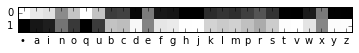

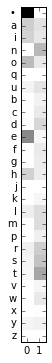

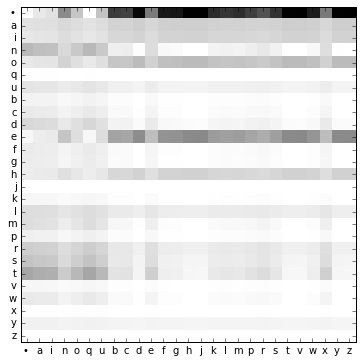

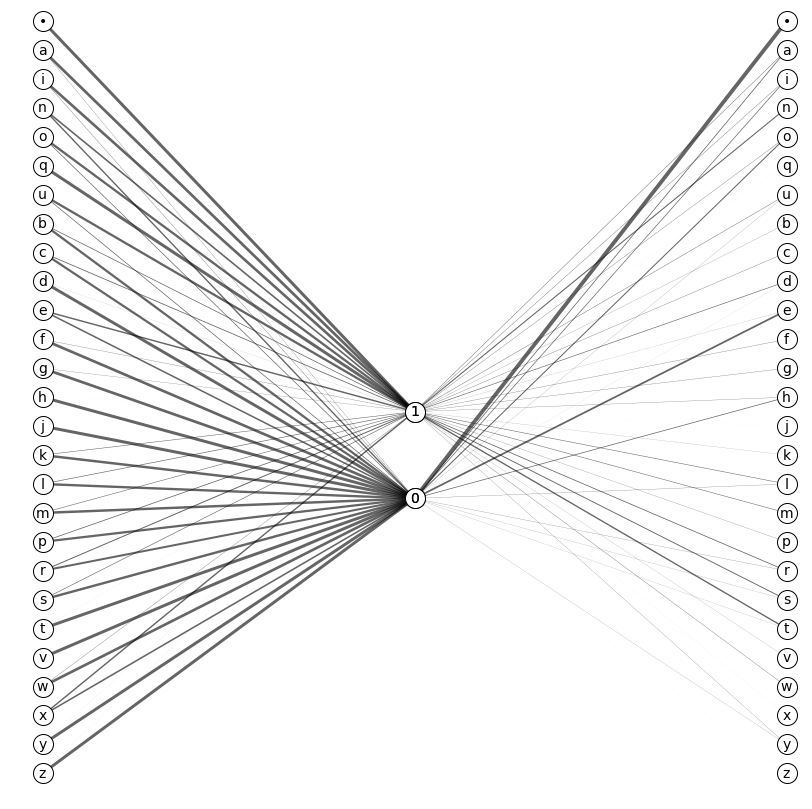

/Users/cemgil/Dropbox/ideas/tensor-fg/figures/H_MM2.pdf


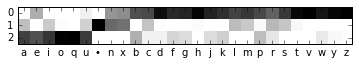

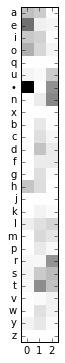

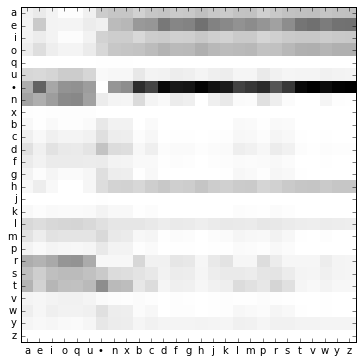

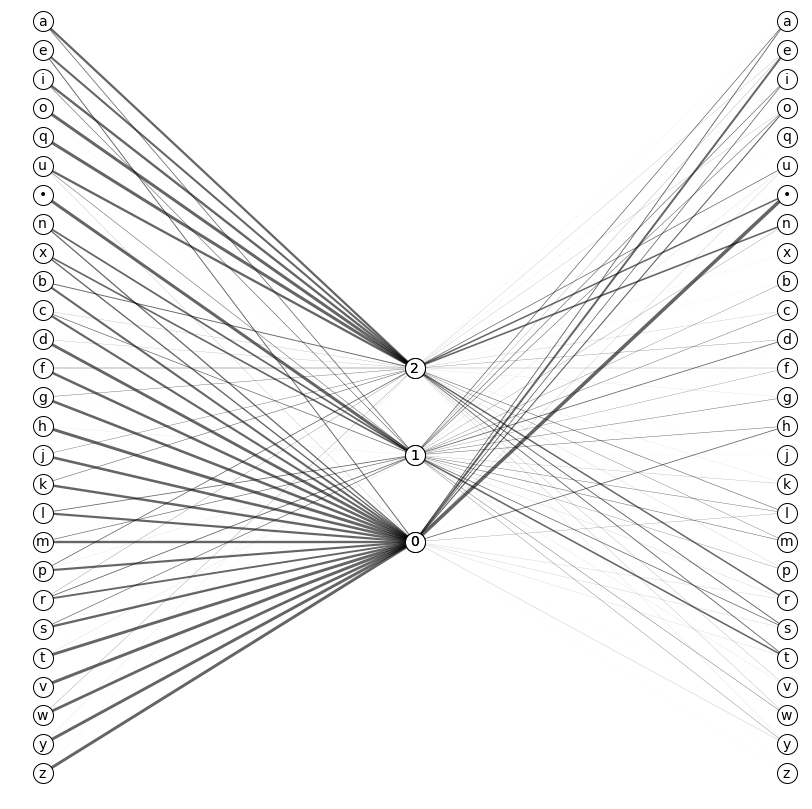

/Users/cemgil/Dropbox/ideas/tensor-fg/figures/H_MM3.pdf


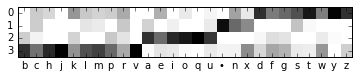

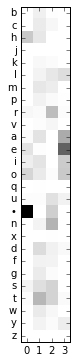

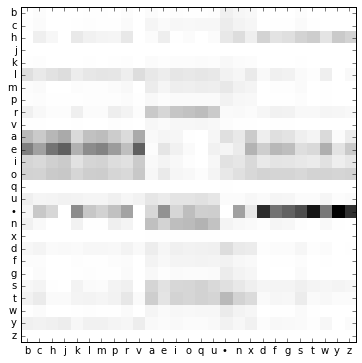

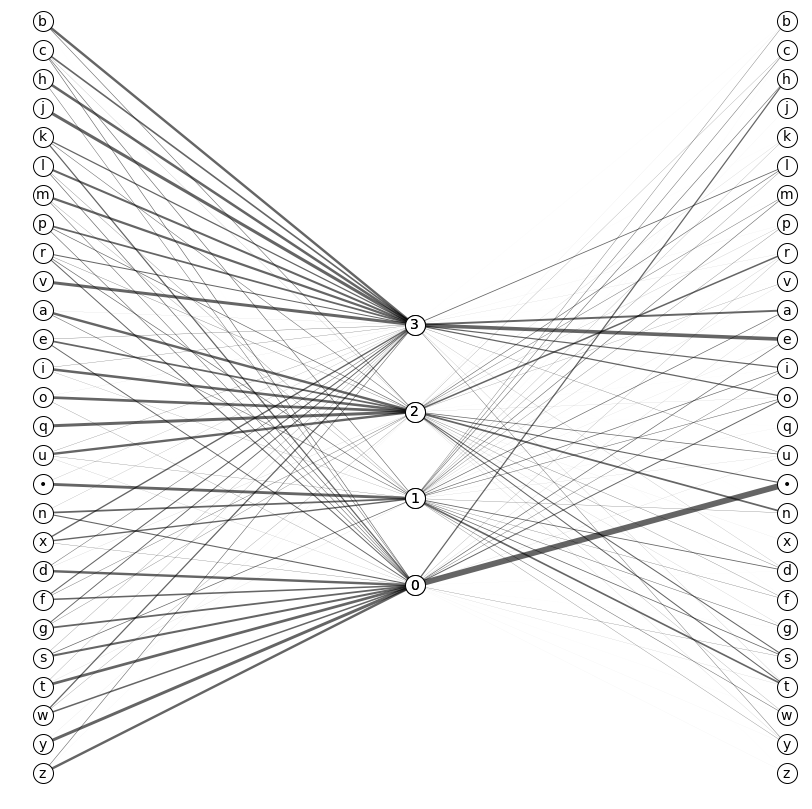

/Users/cemgil/Dropbox/ideas/tensor-fg/figures/H_MM4.pdf


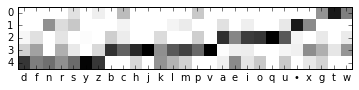

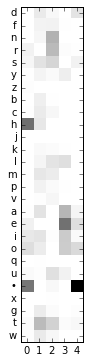

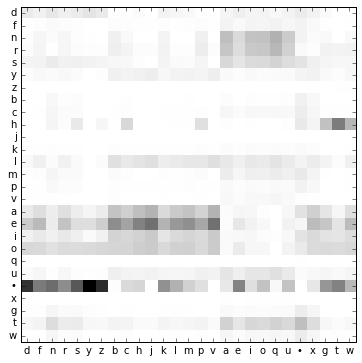

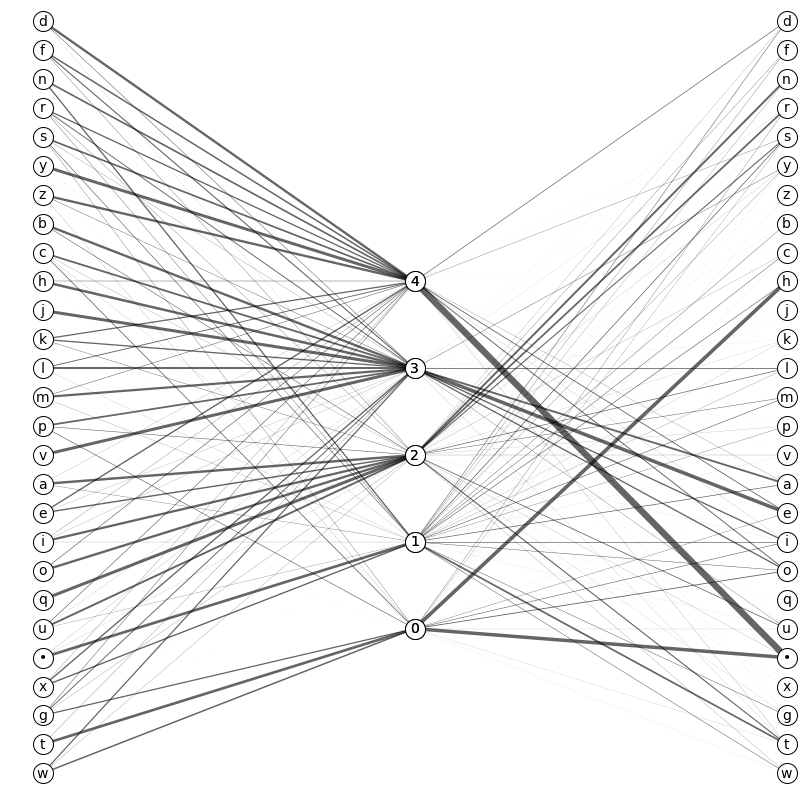

/Users/cemgil/Dropbox/ideas/tensor-fg/figures/H_MM5.pdf


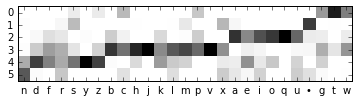

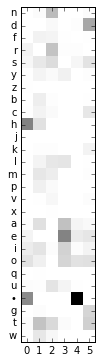

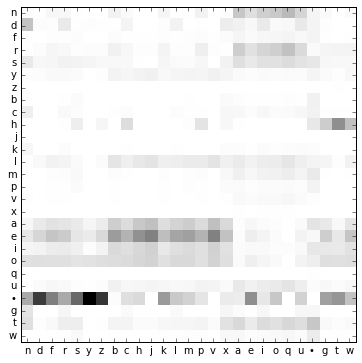

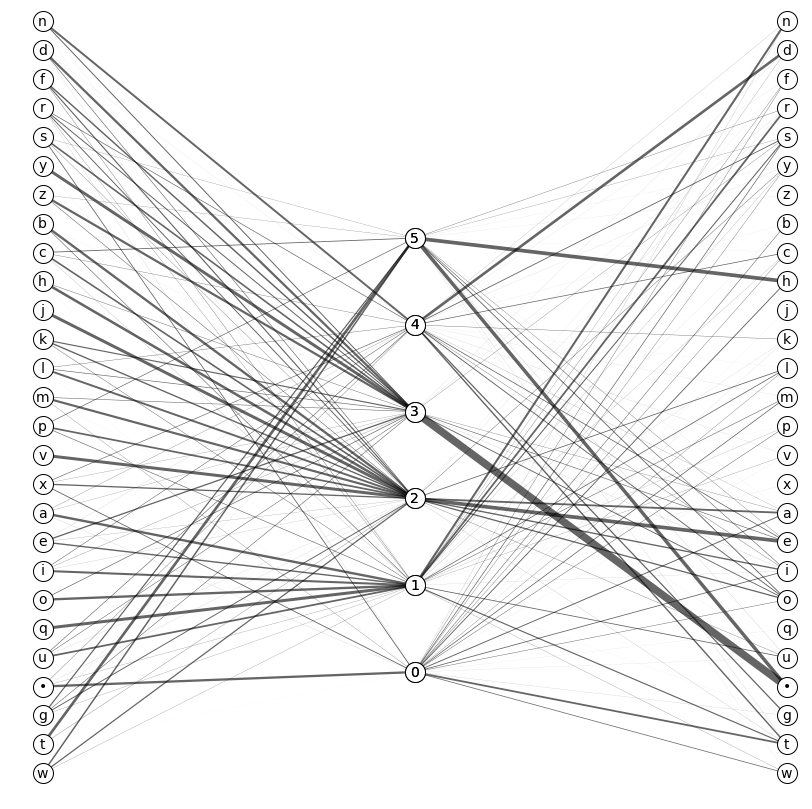

/Users/cemgil/Dropbox/ideas/tensor-fg/figures/H_MM6.pdf


In [335]:
R = 7  #Final rank +1
R0 = 2
savefigs = True
S = DD.shape[0]
D = DD.transpose()

outdir = '/Users/cemgil/Dropbox/ideas/tensor-fg/figures/'

P = D/float(np.sum(D))

#W0 = normalize(np.random.rand(S,R),0)
#H0 = normalize(np.random.rand(R,S),0)
W0 = normalize(np.random.rand(S,R0),0)
H0 = normalize(np.random.rand(R0,S),0)

#for i in range(R, 1, -1):
for rnk in range(R0, R):

    Wtt, Htt = train_reducedMM_stats(D, W0, H0)
            
    figW, figH, figWH = plot_transition_matrix(Wtt, Htt, alphabet, pos_order='order_z')
    figG = plot_transition_graph(10*Wtt, 3*Htt, alphabet, pos_order='order_z')

    if savefigs:
        print(outdir+'H_MM'+str(rnk)+'.pdf')
        figH.savefig(outdir+'H_MM'+str(rnk)+'.pdf',bbox_inches='tight')
        figW.savefig(outdir+'W_MM'+str(rnk)+'.pdf',bbox_inches='tight')
        figWH.savefig(outdir+'WH_MM'+str(rnk)+'.pdf',bbox_inches='tight')
        figG.savefig(outdir+'W_H_Graph_MM'+str(rnk)+'.pdf',bbox_inches='tight')
    
    
    plt.show()
    
    W0 = np.concatenate((Wtt,np.mean(Wtt,axis=1,keepdims=True)),axis=1)
    H0 = np.concatenate((Htt,np.mean(Htt,axis=0,keepdims=True)),axis=0)

    

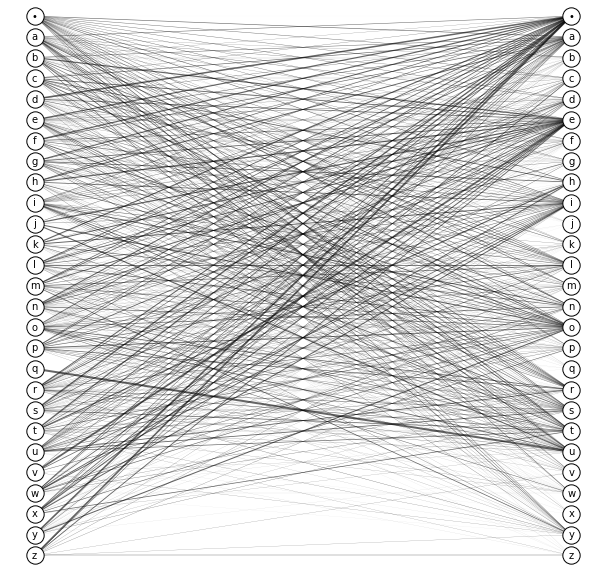

In [329]:
fig = plot_transitions(2*np.sqrt(normalize(P,0)), alphabet,xmargin=0.02, ymargin=0.45)
fig.savefig('/Users/cemgil/Dropbox/ideas/tensor-fg/figures/T_Graph.pdf',bbox_inches='tight',pad_inches=0)

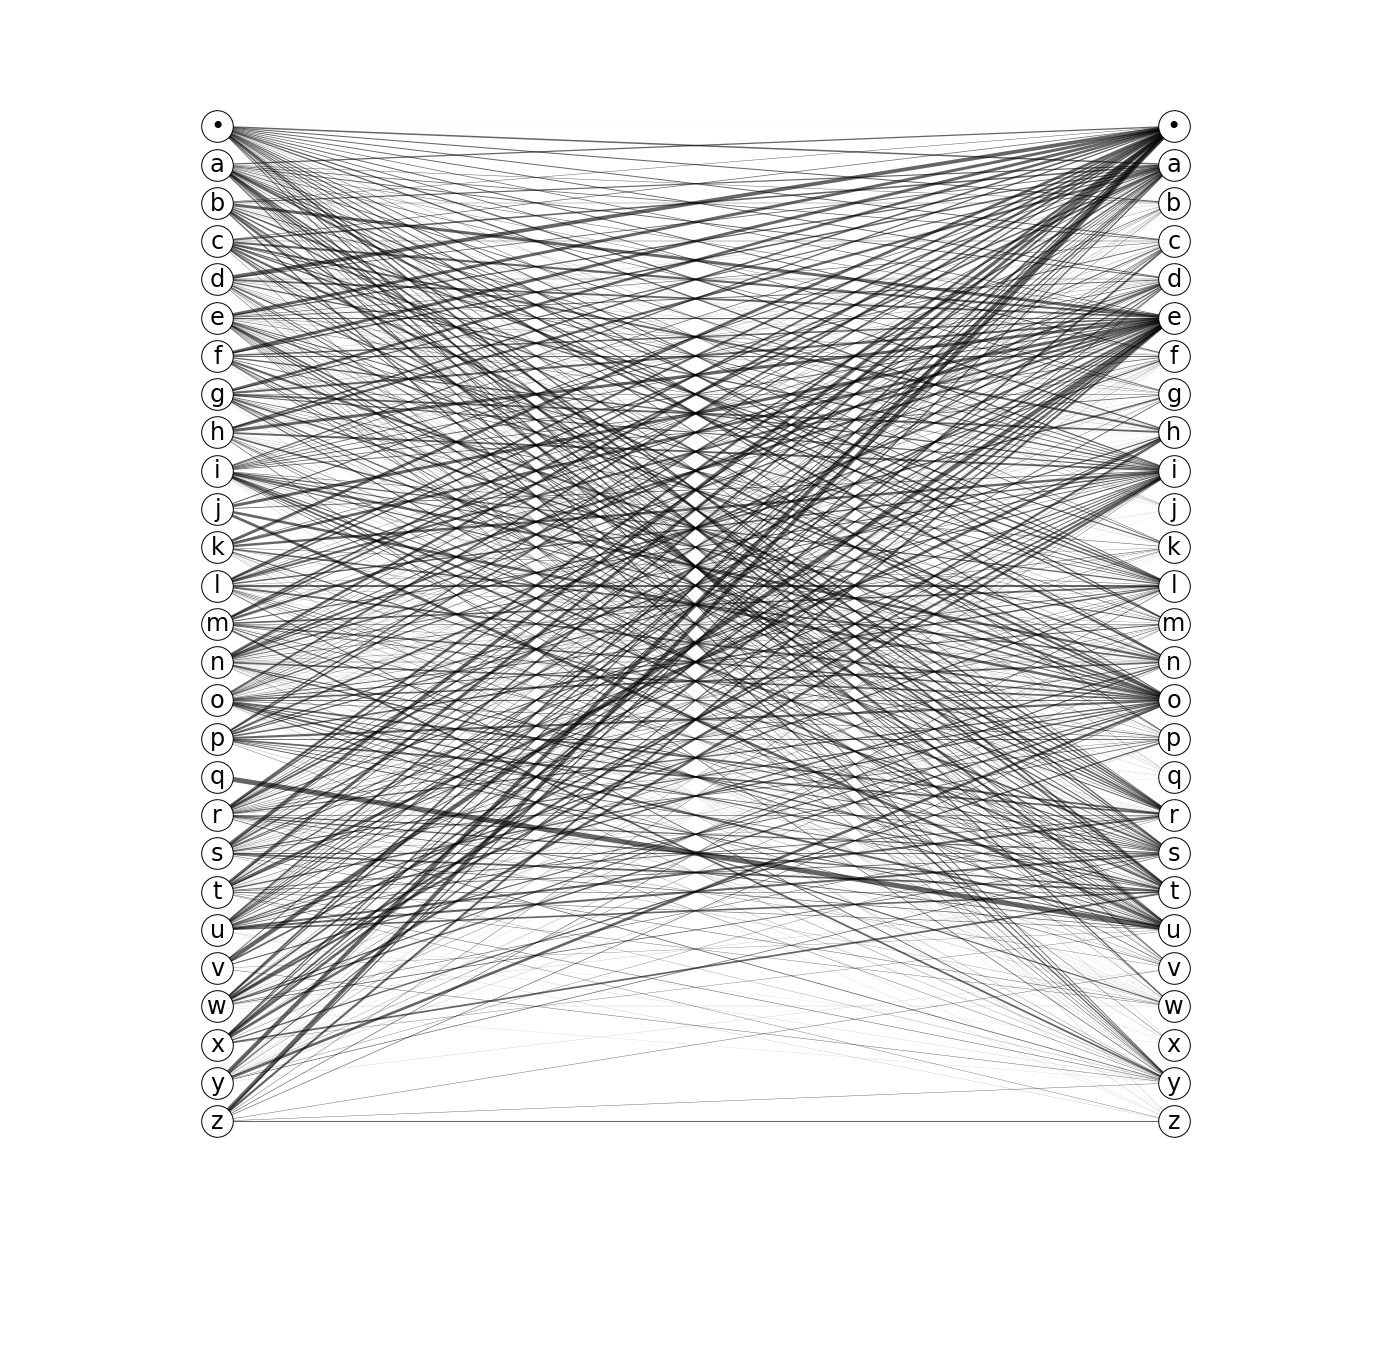

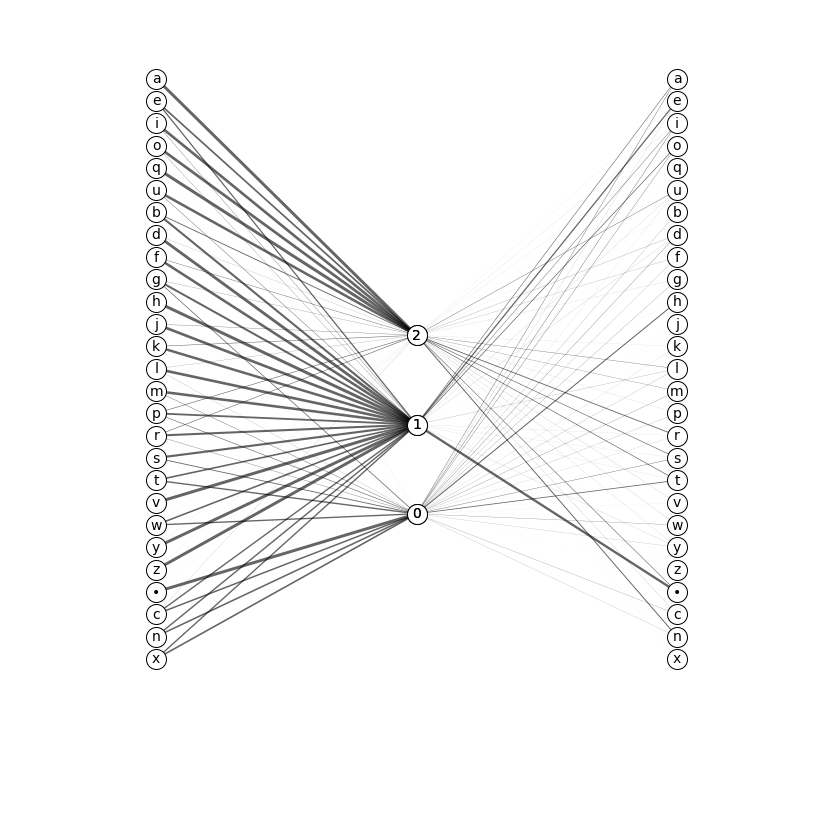

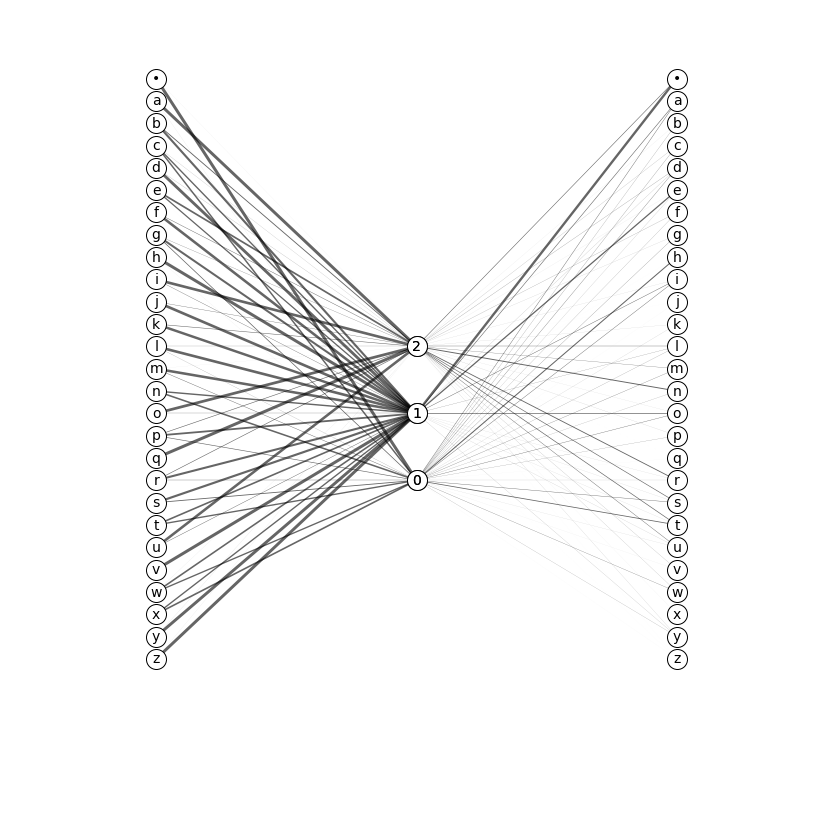

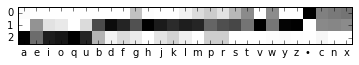

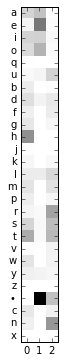

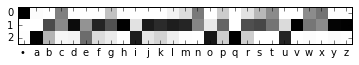

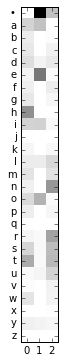

(<matplotlib.figure.Figure at 0x10e979518>,
 <matplotlib.figure.Figure at 0x10e8eef60>)

In [270]:
u = -np.argmax(Htt, axis=0)
idx_H = np.argsort(u,kind='mergesort')
idx_H_inv = np.zeros((M,))
idx_H_inv[idx_H] = np.arange(M)

plot_transition_graph(6*Wtt, 3*Htt, ascii_alphabet, pos_order=idx_H_inv, scale_z_pos=4)
plot_transition_graph(6*Wtt, 3*Htt, ascii_alphabet)
plot_transition_matrix(Wtt, Htt, ascii_alphabet, pos_order=idx_H)
plot_transition_matrix(Wtt, Htt, ascii_alphabet)

In [336]:
27*26

702

In [225]:
tks

['d',
 'f',
 'n',
 'r',
 's',
 'y',
 'z',
 'b',
 'c',
 'h',
 'j',
 'k',
 'l',
 'm',
 'p',
 'v',
 'a',
 'e',
 'i',
 'o',
 'q',
 'u',
 '•',
 'x',
 'g',
 't',
 'w']

In [145]:
A = np.concatenate((np.zeros((27,27)), np.ones((27,27))), axis=1 )
B = np.concatenate((np.ones((27,27)), np.zeros((27,27))),axis=1 )
A = np.concatenate((A,B),axis=0)


5

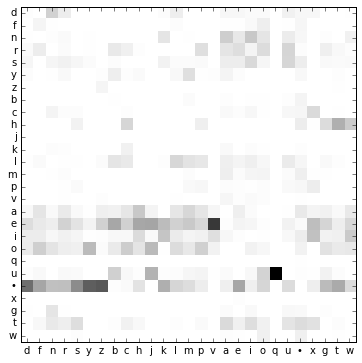

In [139]:
plt.figure(figsize=(6,6))
plt.imshow(normalize(D[idx_H][:,idx_H],axis=0), interpolation='nearest',cmap='gray_r')
tks = [ascii_alphabet[i] for i in idx_H]
plt.yticks(range(27),tks)
plt.xticks(range(27),tks)
plt.show()


[[0 3 6]
 [1 4 7]
 [2 5 8]]


array([[4, 1, 7],
       [3, 0, 6],
       [5, 2, 8]])

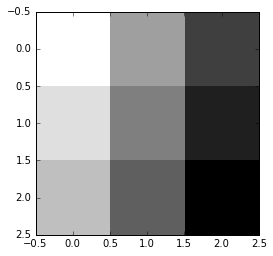

In [136]:
A = np.array(np.reshape(range(9),(3,3)),order='C').T
print(A)

plt.imshow(A, interpolation='nearest',cmap='gray_r')

idx = [1,0,2]

A[idx][:,idx]

In [143]:
from itertools import product

labels = np.concatenate((ascii_alphabet, ascii_alphabet), axis=0)
labels

array(['•', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z', '•', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k',
       'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z'], 
      dtype='<U1')

In [1]:
%connect_info

{
  "key": "1ab8fd8c-ccad-41fc-9d75-4353bbe55f4d",
  "iopub_port": 62495,
  "signature_scheme": "hmac-sha256",
  "shell_port": 62494,
  "hb_port": 62498,
  "stdin_port": 62496,
  "control_port": 62497,
  "transport": "tcp",
  "ip": "127.0.0.1"
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/cemgil/Library/Jupyter/runtime/kernel-810cbb6a-c22c-4db1-9cf2-d1a66e038e32.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.
